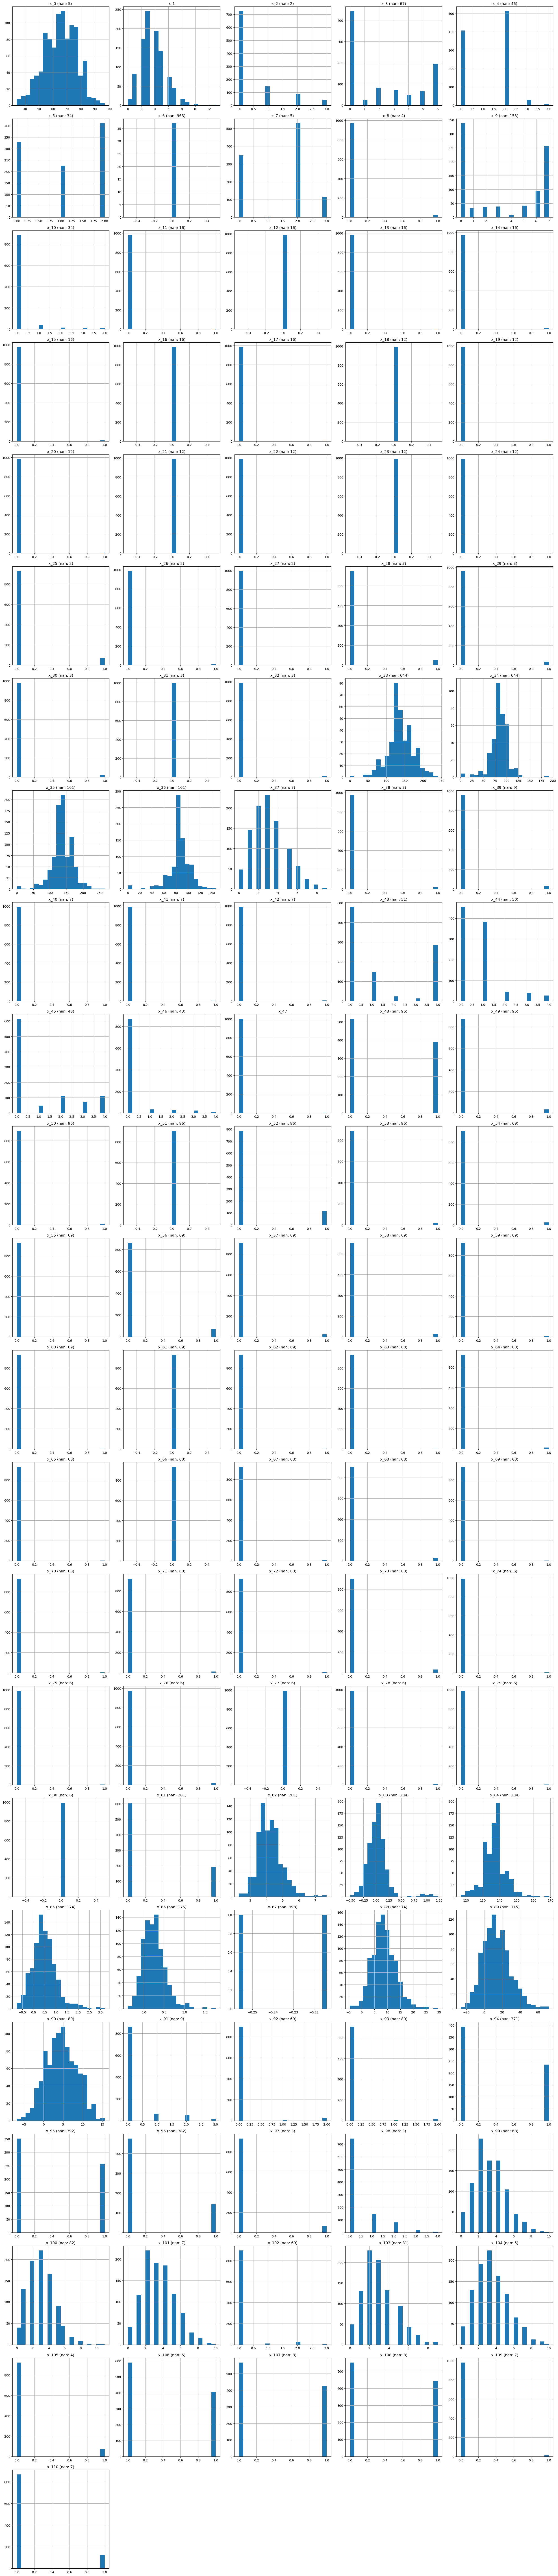

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dataframe, cols_per_row=5):
    num_columns = len(dataframe.columns)
    num_rows = np.ceil(num_columns / cols_per_row).astype(int)

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(dataframe.columns):
        missing_values_count = dataframe[column].isna().sum()
        title = f'{column}'
        if missing_values_count > 0:
            title += f' (nan: {missing_values_count})'
        
        dataframe[column].dropna().hist(ax=axes[i], bins=20)  # 丢弃缺测值
        axes[i].set_title(title)

    # 隐藏空余的子图
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

x_train = np.load("X_train.npy")
x_train = pd.DataFrame(x_train).rename(columns={i: f"x_{i}" for i in range(111)})

plot_histograms(x_train)



In [34]:

# 加载数据
x_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")
x_test=np.load("X_test.npy")

# 转换为DataFrame并重命名列
x_train = pd.DataFrame(x_train).rename(columns={i: f"x_{i}" for i in range(111)})
x_test = pd.DataFrame(x_test).rename(columns={i: f"x_{i}" for i in range(111)})

# 中位数填补缺失值
for column in x_train.columns:
    median_value = x_train[column].median()
    x_train[column].fillna(median_value, inplace=True)
    x_test[column].fillna(median_value, inplace=True)



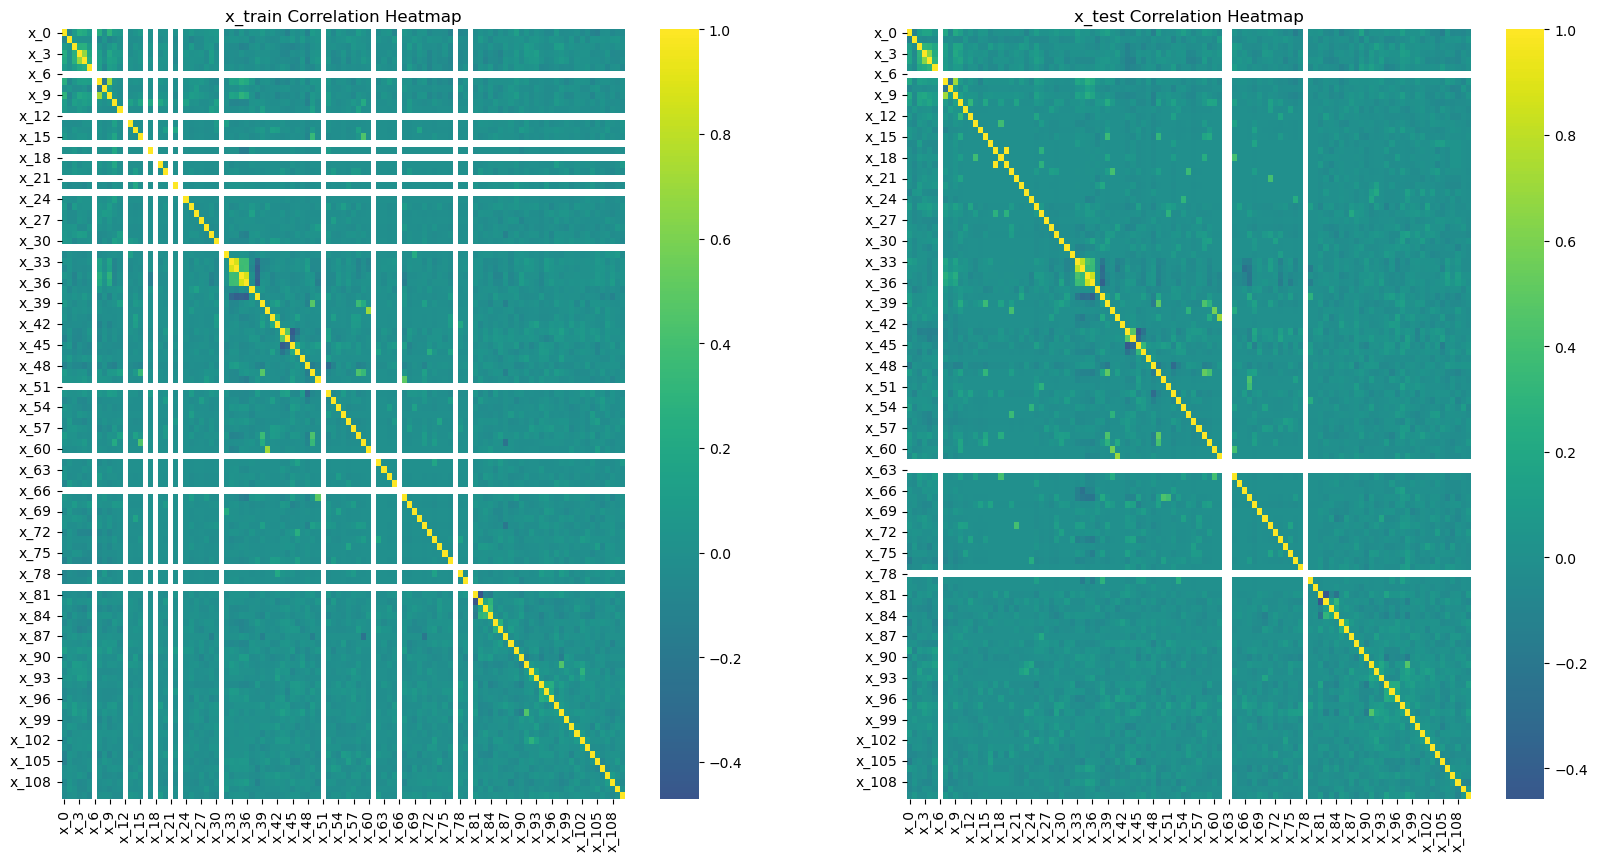

In [35]:

# 计算相关性矩阵
corr_matrix_train = x_train.corr()
corr_matrix_test = x_test.corr()

# 设置绘图大小
plt.figure(figsize=(20, 10))

# 绘制 x_train 的相关性热力图
plt.subplot(1, 2, 1)  # 创建子图1
sns.heatmap(corr_matrix_train, annot=False, cmap='viridis', center=0)
plt.title('x_train Correlation Heatmap')

# 绘制 x_test 的相关性热力图
plt.subplot(1, 2, 2)  # 创建子图2
sns.heatmap(corr_matrix_test, annot=False, cmap='viridis', center=0)
plt.title('x_test Correlation Heatmap')

# 显示图形
plt.show()

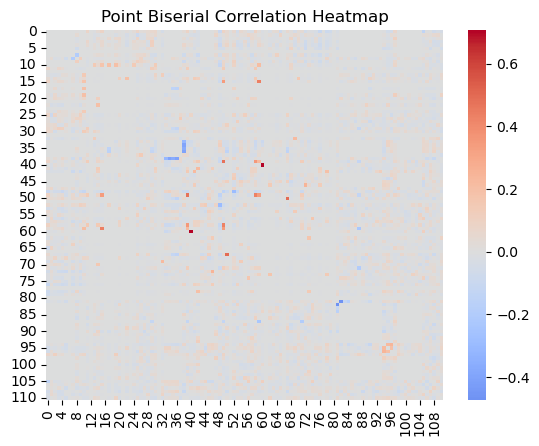

In [36]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

# 模拟加载数据的过程
# x_train = np.load("X_train.npy")

# 这里假设您的数据加载和预处理步骤已经完成
# x_train = pd.DataFrame(x_train).rename(columns={i: f"x_{i}" for i in range(111)})

# 中位数填补缺失值
# for column in x_train.columns:
#     median_value = x_train[column].median()
#     x_train[column].fillna(median_value, inplace=True)

# 计算点双系数
def calculate_pointbiserialr(dataframe):
    columns = dataframe.columns
    n_cols = len(columns)
    correlation_matrix = np.zeros((n_cols, n_cols))

    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i >= j:  # 避免重复计算
                continue

            # 确定哪个变量是二元的，哪个是连续的
            unique_values = dataframe[[col1, col2]].nunique()
            if unique_values.min() == 2:  # 如果有一个是二元的
                if unique_values.idxmin() == col1:
                    # col1是二元变量
                    corr, _ = pointbiserialr(dataframe[col1], dataframe[col2])
                else:
                    # col2是二元变量
                    corr, _ = pointbiserialr(dataframe[col2], dataframe[col1])
                # 填充对称的矩阵元素
                correlation_matrix[i, j] = correlation_matrix[j, i] = corr

    return correlation_matrix

# 假设所有变量都是二元的，这仅仅是为了示例
# 真正的分析需要您检查变量确定哪些是二元的
correlation_matrix = calculate_pointbiserialr(x_train)

# 绘制热力图
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Point Biserial Correlation Heatmap')
plt.show()


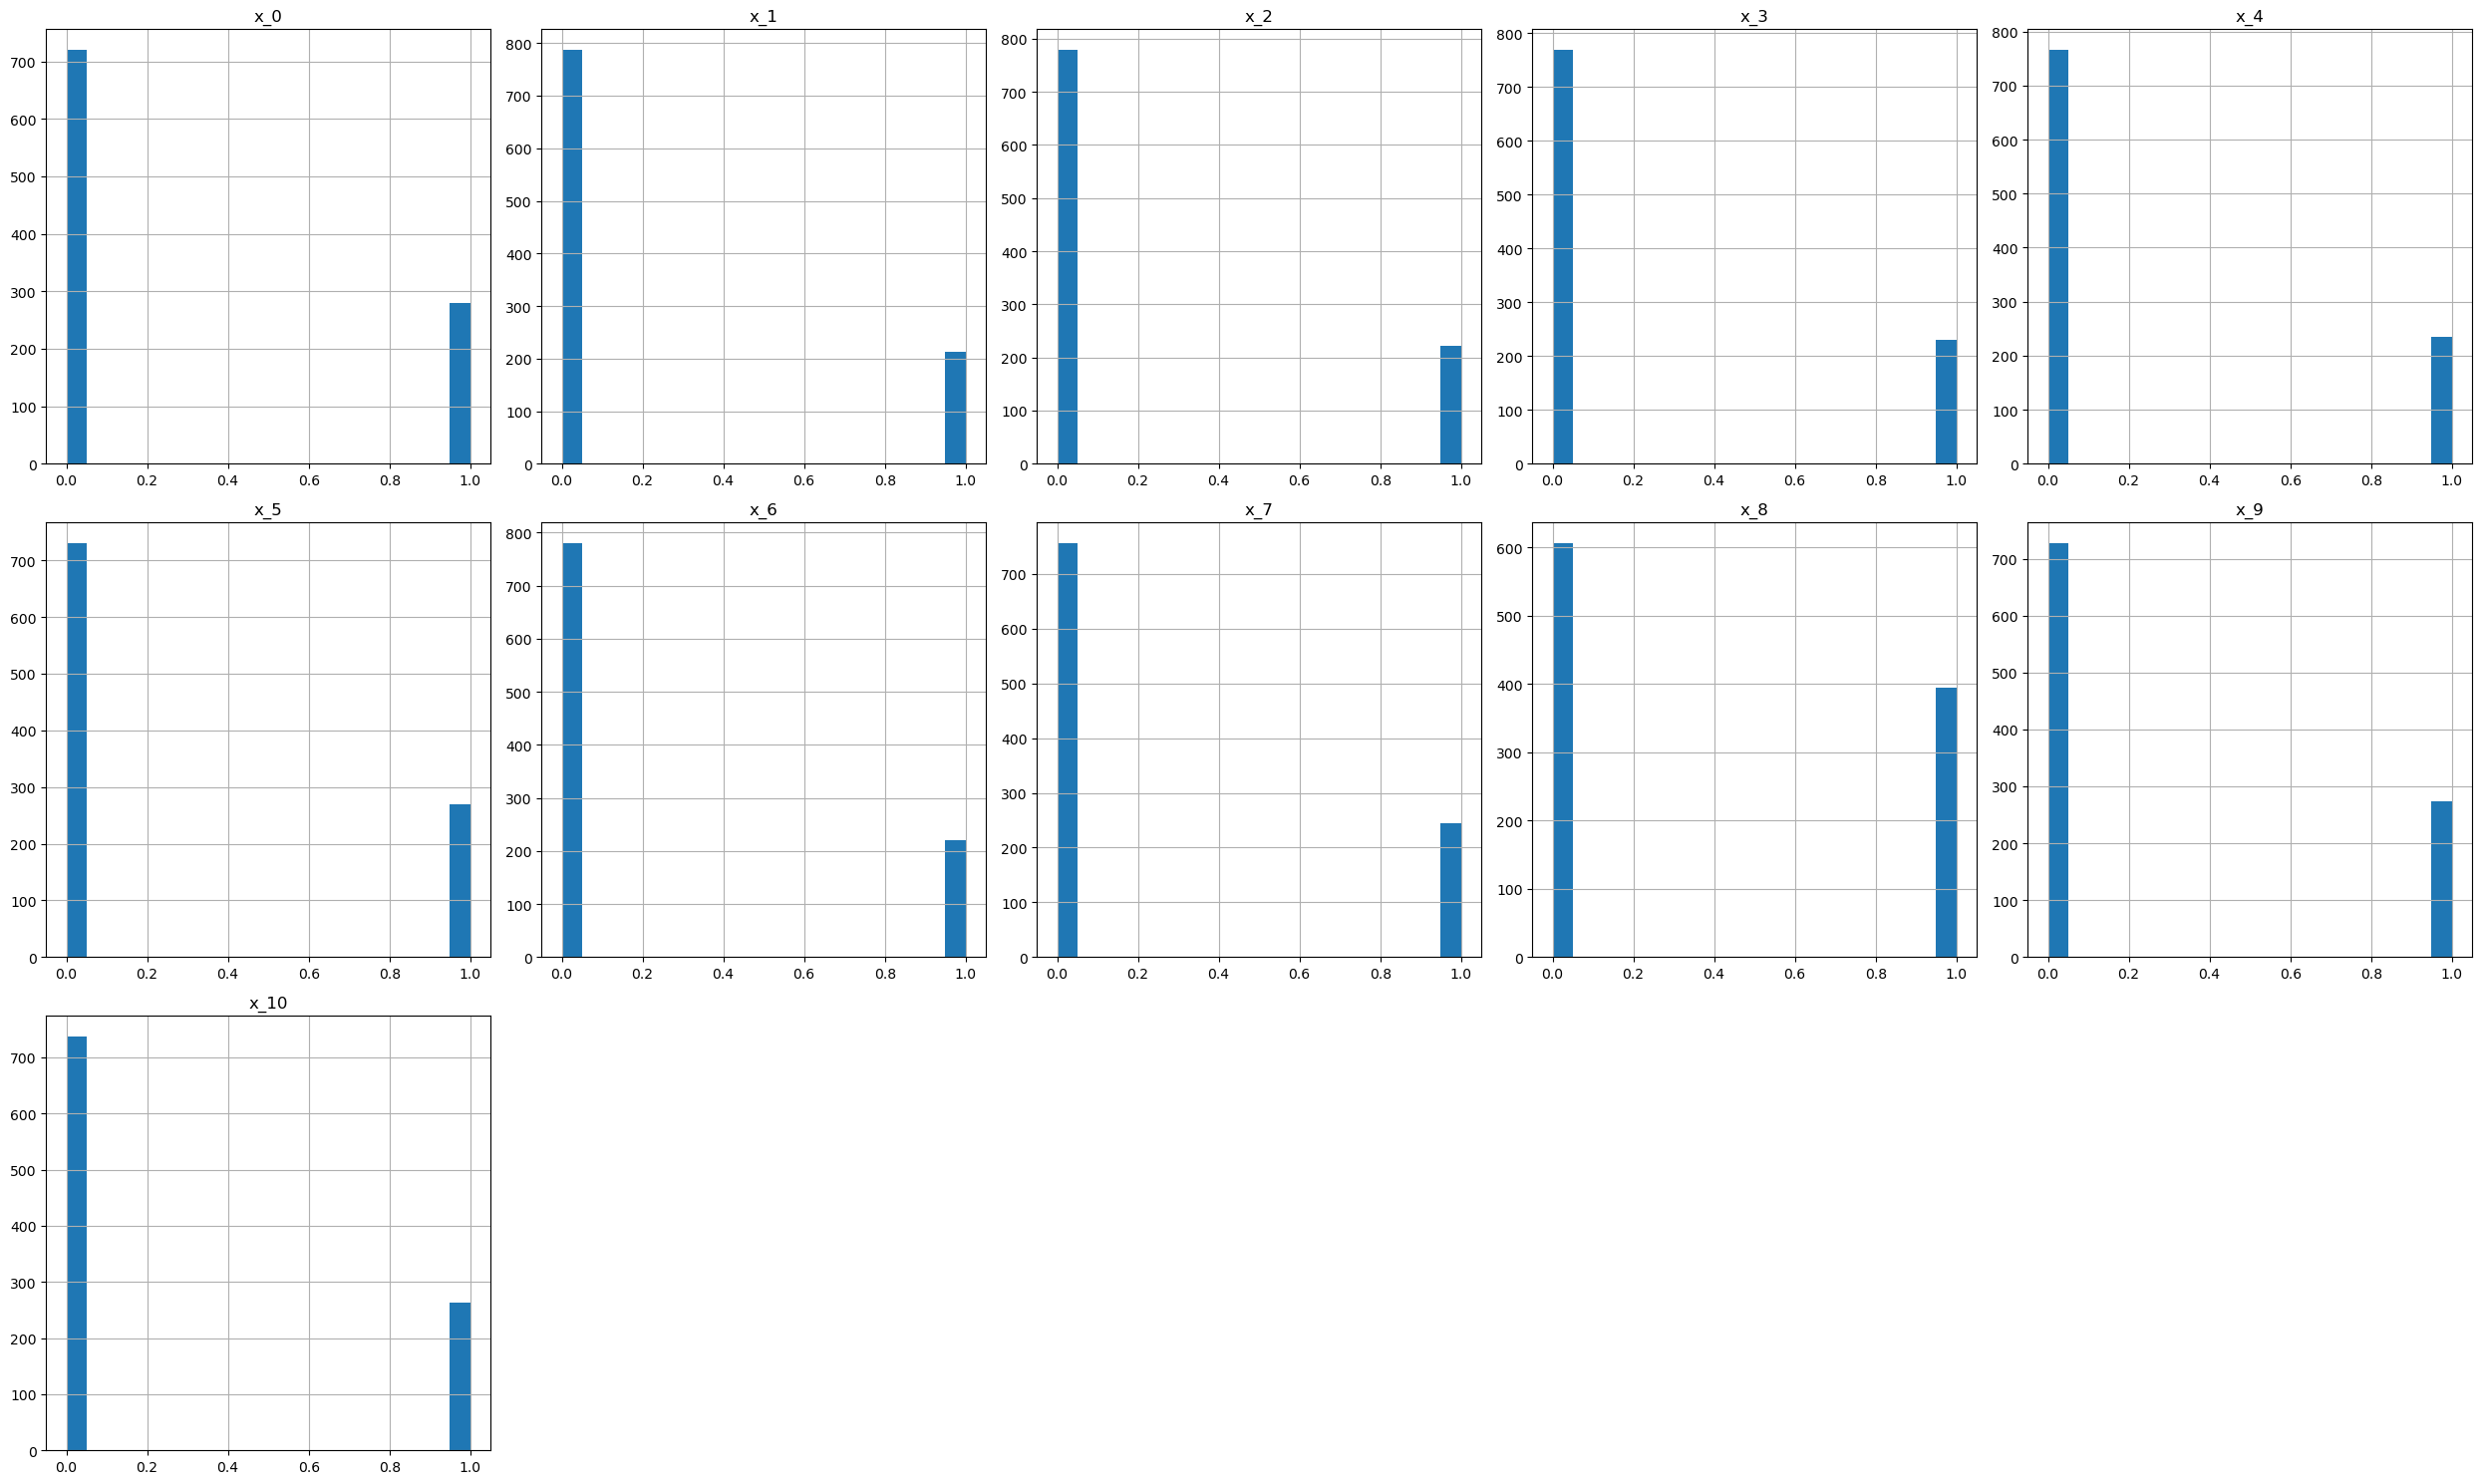

In [37]:
y_train = np.load("y_train.npy")
y_train = pd.DataFrame(y_train).rename(columns={i: f"x_{i}" for i in range(111)})

plot_histograms(y_train)